## Data Wrangling - @WeRateDogs

### Table of Contents
- [Introduction] 

- [Data gathering]

- [Data assessment]
    - [Quality]
    - [Tidiness]
    - [Unexpected results]

- [Data Cleaning]
- [Data Insights]
- [Data Visualization]

<a id='intro'></a>

#### Project: Wrangle; clean; analyze and report findings for Twitter archive of the profile for @WeRateDogs
##### Set-up

In [1]:
# Import required software packages 
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
from IPython.display import HTML
import math
import time 
import seaborn as sns

## Twitter data collection / preliminary review

In [2]:
# Import Twitter CSV-file / create DataFrame
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [4]:
# Continue checking / confirming this loads correctly
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Continue checking / confirming this loads correctly
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# Continue checking / confirming this loads correctly
twitter_archive_df.shape[0]

2356

In [7]:
# Continue checking / confirming this loads correctly
twitter_archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [8]:
# Continue checking / confirming this loads correctly
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Upload / general review of the image predictions file to get a sense of the content of the file before conducting some of the same steps for the json-file 

### Column Headers 

twitter_archive_df

##### 1) tweet_id: unique tweet ID 
##### 2) in_reply_to_status_id: integer representation of original tweet’s ID
##### 3) in_reply_to_user_id: integer representation of the original, author's tweet ID
##### 4) timestamp: tweet-time of Twitter post 
##### 5) source: medium used, i.e., Twitter for Android, Twitter for iPhone, Twitter Web Client
##### 6) text: UTF-8 text of status update
##### 7) retweeted_status_id: integer representation of the original tweet’s ID
##### 8) retweeted_status_user_id: integer representation of the original, author's tweet ID
##### 9) retweeted_status_timestamp: retweet-time 
##### 10) expanded_urls: tweet URL
##### 11) rating_numerator: dog-rating numerator (frequently greater than ten)
##### 12) rating_denominator: dog-rating denominator (frequently greater than ten)
##### 13) name: dog's name 
##### 14) doggo: @WeRateDogs name/term for "stage"
##### 15) floofer: @WeRateDogs name/term for "stage"
##### 16) pupper: @WeRateDogs name/term for "stage"
##### 17) puppo: @WeRateDogs name/term for "stage"

## Image Predictions data collection / preliminary review

In [10]:
# Program download of the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [9]:
# Import Image Predictions TSV-file / create DataFrame
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
# Continue checking / confirming this loads correctly
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# Continue checking / confirming this loads correctly
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# Continue checking / confirming this loads correctly
image_predictions_df.shape[0]

2075

In [14]:
# Continue checking / confirming this loads correctly
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [15]:
# Continue checking / confirming this loads correctly
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## Twitter API/json data collection / preliminary review

In [58]:
# Twitter API Keys / Access Token 
consumer_key = 'fYUqgtP8xdvLBX1DdAECcMMy9'
consumer_secret = 'aJKZt6q3zrTxeHlsxM2WevYDpqxAuf0KJBt1YzEOYKImtG9AWY'
access_token = '921963054639861761-Y7RowZJI9pB2YkjMjsI3O71zfRUP7vC'
access_secret = 'W3akd0x35RNzkZRVeafLsqpPtV1kniWxlk9VBcH3Si4lX'

In [59]:
# Authenticate this step in the process
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [60]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [61]:
# Access archived Tweet ID; query Twitter API / match with JSON

start = time.time() # start timer

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = twitter_archive_df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

KeyboardInterrupt: 

In [62]:
# Create dictionary-list; read JSON data; DataFrame conversion
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create DataFrame with tweet ID; retweet count; favorite count; display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [63]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None


In [64]:
# Continue checking / confirming this loads correctly
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [65]:
# Look for twitter_archive_df retweets
len(twitter_archive_df[twitter_archive_df.retweeted_status_id.isnull() == False])

181

In [66]:
# Look for twitter_archive_df same tweet_id not in image_predictions_df
len(twitter_archive_df[~twitter_archive_df.tweet_id.isin(image_predictions_df.tweet_id)])

281

In [67]:
# Check rating_denominators
twitter_archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [68]:
# Check rating_numerators
twitter_archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [69]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_df.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

### Assess Image Predictions DataFrame

In [70]:
# Check image_predictions Dataframe
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [71]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df.shape

(2075, 12)

In [73]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df['tweet_id'].nunique()

2075

In [74]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df['jpg_url'].nunique()

2009

In [75]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df['img_num'].nunique()

4

In [53]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df['jpg_url'].nunique()

2009

### Assess JSON DataFrame

In [76]:
# Check / confirm this DataFrame loads / is viewable
status_df.head(5)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8148,37462,"[0, 85]"
1,892177421306343426,6034,32190,"[0, 138]"
2,891815181378084864,3993,24268,"[0, 121]"
3,891689557279858688,8309,40758,"[0, 79]"
4,891327558926688256,9001,38993,"[0, 138]"


In [77]:
# Check / confirm this DataFrame loads / is viewable
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 4 columns):
tweet_id              881 non-null int64
retweet_count         881 non-null int64
favorite_count        881 non-null int64
display_text_range    881 non-null object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB


In [78]:
# Check / confirm this DataFrame loads / is viewable
status_df.shape

(881, 4)

In [79]:
# Check / confirm this DataFrame loads / is viewable
status_df['tweet_id'].nunique()

881

## Clean 

### Create Master DataFrame 

In [80]:
# Combine all three into one DataFrame

# Twitter archive plus image predictions
master_df = pd.merge(twitter_archive_df, image_predictions_df, how = 'left', on = ['tweet_id'])

# Master DataFrame plus json 
master_df = pd.merge(master_df, status_df, how = 'left', on = ['tweet_id'])

In [81]:
# Check / confirm this DataFrame loads / is viewable
master_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8148.0,37462.0,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6034.0,32190.0,"[0, 138]"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,3993.0,24268.0,"[0, 121]"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8309.0,40758.0,"[0, 79]"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9001.0,38993.0,"[0, 138]"


In [82]:
# Check / confirm this DataFrame loads / is viewable
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [83]:
master_df.shape

(2356, 31)

### Drop duplicates
### Drop tweets missing pictures 

In [87]:
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'display_text_range']

In [88]:
# Delete tweets missing pictures
master_df = master_df.dropna(subset = ['jpg_url'])

In [91]:
# Delete timestamp 
master_df = master_df.drop('timestamp', 1)

In [92]:
# Delete additional columns
master_df = master_df.drop('retweeted_status_id', 1)
master_df = master_df.drop('retweeted_status_user_id', 1)
master_df = master_df.drop('retweeted_status_timestamp', 1)

In [93]:
# Check revised DataFrame 
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'display_text_range']

In [94]:
# Check doggo and floofer columns which are not None
len(twitter_archive_df[(twitter_archive_df.doggo != 'None') & (twitter_archive_df.floofer != 'None')])

1

In [95]:
# Check pupper and puppo columns which are not None
len(twitter_archive_df[(twitter_archive_df.pupper != 'None') & (twitter_archive_df.puppo != 'None')])

0

In [96]:
# Check doggo and pupper columns which are not None
len(twitter_archive_df[(twitter_archive_df.doggo != 'None') & (twitter_archive_df.pupper != 'None')])

12

In [97]:
# Check floofer and puppo columns which are not None
len(twitter_archive_df[(twitter_archive_df.floofer != 'None') & (twitter_archive_df.puppo != 'None')])

0

In [98]:
# Check doggo and pupper columns which are not None
len(twitter_archive_df[(twitter_archive_df.doggo != 'None') & (twitter_archive_df.puppo != 'None')])

1

In [40]:
# Check floofer and pupper columns which are not None
len(twitter_archive_df[(twitter_archive_df.floofer != 'None') & (twitter_archive_df.pupper != 'None')])

0

In [99]:
# Check / confirm this DataFrame loads / is viewable
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,0.006438,False
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True


### Column Headers

image_predictions_df

##### 1) tweet_id: unique tweet ID 
##### 2) jpg_url: dog-image URL
##### 3) img_num: associated confidence prediction number 
##### 4) p1: number 1 associated algorithm-confidence prediction 
##### 5) p1_conf: number 1 associated algorithm prediction
##### 6) p1_dog: whether or not prediction relates to dog-breed
##### 7) p2: number 2 associated algorithm-confidence prediction 
##### 8) p2_conf: number 2 associated algorithm prediction
##### 9) p2_dog: whether or not prediction relates to dog-breed
##### 10) p3: number 3 associated algorithm-confidence prediction 
##### 11) p3_conf: number 3 associated algorithm prediction
##### 12) p3_dog: whether or not prediction relates to dog-breed

In [100]:
# Continue checking / confirming this loads correctly
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [101]:
# Continue checking / confirming this loads correctly
status_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
551,802185808107208704,284,0,"[0, 140]"
572,799308762079035393,5945,0,"[0, 140]"
627,793180763617361921,2144,7329,"[0, 38]"
317,833124694597443584,5105,20937,"[0, 118]"
341,831262627380748289,2163,12364,"[0, 116]"


In [102]:
# Continue checking / confirming this loads correctly
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 4 columns):
tweet_id              881 non-null int64
retweet_count         881 non-null int64
favorite_count        881 non-null int64
display_text_range    881 non-null object
dtypes: int64(3), object(1)
memory usage: 27.6+ KB


status_df (tweet status) columns:

##### id: unique tweet-identifier
##### retweet_count: number of times Tweet is retweeted
##### favorite_count: approximate number of times Tweet liked by other users
##### display_text_range: two unicode code point indices, ID'ing the start/end of Tweet's displayable content

### Quality 

twitter_archive_df

##### retweets means there are duplicates 
##### misc. tweet_id are without the associated image_prediction
##### misc. data-types, e.g., in_reply_to_status or in_reply_to_user_id
##### misc. HTML-tags
##### untruncated-text 
##### disparate numerator/denominator numbers
##### rating_numerators; low and/or high-ranges (above 10) 
##### rating_denominators: low-range (below 10)
##### dog-names that are not really names but a letter, etc. 
##### more than one dog-stage 

### Tidiness 

##### remove any/all duplicate retweets; drop data-types (not required for analysis), e.g., drop retweeted_status, retweeted_status_timestamp columns; 
##### missing tweet_ids have to be addressed; 
##### retweet_count; favorite_count need to be joined together
##### merge @WeRateDog's categories into one
##### add breed as an additional column for analysis in the DataFrame

### Data Cleaning

##### Define: Keep original tweet rows / delete retweeted_status

### Code

In [103]:
# Create a clean twitter_archive_df copy to perform various cleaning tasks
twitter_archive_clean = twitter_archive_df.copy()

In [104]:
# Remove Retweeted Status ID
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

### Test

In [105]:
# Continue checking / confirming this loads correctly
len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False])

0

### Define

##### Keep matching tweet_id twitter_archive_clean / image_predictions_df info

### Code

In [106]:
# Keep matching Tweet_ID / Image_Predictions information 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions_df.tweet_id)]

### Test

In [107]:
# Continue checking / confirming this loads correctly
len(twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions_df.tweet_id)])

0

### Tidiness 

##### Check for columns to drop; retweeted_status_id; retweeted_status_user_id; retweeted_status_timestamp

In [108]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

### Define 

##### Remove retweeted_status_id; retweeted_status_user_id; retweeted_status_timestamp

### Code

In [109]:
# Drop irrelevant columns / not required for analysis
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test 

In [110]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


### Define 

##### Convert in_reply_status_id; in_reply_to_user_id 
##### Convert timestamp to datetime 

### Code

In [111]:
# Convert misc. datatypes 
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(0)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(0)

twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(np.int64)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(np.int64)

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

### Test

In [112]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


### Define 

##### Remove HTML anchor tags; retain HTML tweet-text

### Code

In [113]:
# Continue cleaning-up HTML tags 
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [114]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

### Test

In [115]:
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'display_text_range']

In [59]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Define 

##### use _display_text_range with extract Tweet-text 

### Code

In [116]:
# Check for untruncated text 
# Before extraction - first seconds of untruncated text
print(twitter_archive_clean.iloc[0].text)
print(twitter_archive_clean.iloc[1].text)
print(twitter_archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [117]:
# Merge status_df's display_text_range column into twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [118]:
# Access displayable text
for i, row in twitter_archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    twitter_archive_clean.set_value(i, 'text', display_text)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [119]:
# Drop column - display_text_range
twitter_archive_clean.drop('display_text_range', axis=1, inplace=True)

### Test

In [120]:
# Continue checking / confirming this loads correctly
print(twitter_archive_clean.iloc[0].text)
print(twitter_archive_clean.iloc[1].text)
print(twitter_archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


### Define 

##### Sort out rating_denominators / rating_numerators taking into account the disparate-range of ratings for these two categories 

### Code 

In [121]:
# Sort out denominators 
pattern = "\s*(\d+([.]\d+)?([/]\d+))"
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [122]:
# Check / confirm / iterate through this process 
for i, row in twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # Continue sorting 
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        #  Continue sorting 
        if n%divisor == 0:
            # reassign rating_denominator as 10
            twitter_archive_clean.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            twitter_archive_clean.set_value(i, 'rating_numerator', int(n/divisor))
    
    #  Continue sorting 
    else:
        # Continue sorting
        ratings = tokens(row.text)
        # Continue sorting
        for rating in ratings:
            # Continue sorting
            if rating.split('/')[1] == '10':
                # Continue sorting
                twitter_archive_clean.set_value(i, 'rating_denominator', 10)
                # Continue sorting
                twitter_archive_clean.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


### Test

In [200]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.rating_denominator.value_counts()

10    656
7       1
Name: rating_denominator, dtype: int64

### Define

##### continue the process of sorting out the rating_numerators

In [124]:
# Sort out numerators 
twitter_archive_clean[(twitter_archive_clean.rating_numerator <= 10) | (twitter_archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0      1
3      1
4      1
5      2
6      1
7      2
8      2
9      1
10    38
24     1
27     1
75     1
Name: rating_numerator, dtype: int64

### Code

In [125]:
# Check / confirm / iterate through this process 
for i, row in twitter_archive_clean[(twitter_archive_clean.rating_numerator <= 10) | (twitter_archive_clean.rating_numerator > 14)].iterrows():
    ratings = tokens(row.text)
    for rating in ratings:        
        if rating.split('/')[1] == '10':
            n = int(round(float(rating.split('/')[0])))
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                twitter_archive_clean.set_value(i, 'rating_numerator', n)
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


### Test

In [126]:
# Continue checking / confirming this loads correctly
twitter_archive_clean[(twitter_archive_clean.rating_numerator <= 10) | (twitter_archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0      1
3      1
4      1
5      1
6      1
7      2
8      2
9      1
10    39
24     1
Name: rating_numerator, dtype: int64

### Define

##### Replace non-name, dog-names with None

### Code

In [127]:
# Check / sort-out dog names 
twitter_archive_clean['name'][twitter_archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test 

In [201]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.name[twitter_archive_clean.name == 'None'].value_counts()

None    127
Name: name, dtype: int64

In [129]:
# Check / sort dog names by ascending order
twitter_archive_clean.name.value_counts().sort_index(ascending=False)

Zooey        1
Zoey         2
Zeke         3
Yogi         2
Wyatt        2
Wishes       1
Winston      4
Winnie       3
Wilson       2
Willow       1
Willem       1
Wiggles      1
Wesley       1
Walter       2
Wallace      2
Waffles      3
Wafer        1
Vixen        1
Vincent      1
Venti        1
Tyr          2
Tycho        1
Tucker       5
Tuck         1
Trooper      1
Tove         1
Tonks        1
Tom          1
Toby         3
Tobi         1
            ..
Beau         1
Bear         3
BeBe         1
Bauer        1
Baron        1
Barney       1
Bailey       3
Ava          1
Autumn       1
Augie        1
Aubie        1
Atlas        2
Aspen        1
Ash          1
Arya         1
Arlo         1
Archie       1
Anna         1
Angel        1
Anakin       1
Alice        1
Alfy         1
Alfie        2
Alf          1
Alexander    1
Albus        2
Albert       1
Al           1
Akumi        1
Aja          1
Name: name, Length: 409, dtype: int64

### Define 

##### Sort out; eliminate more than one dog-stage entries; including combined dog-stages

### Code 

In [ ]:
# Check for multiple dog-stages
print(len(twitter_archive_clean[(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.floofer != 'None')]))
print(len(twitter_archive_clean[(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.puppo != 'None')]))
print(len(twitter_archive_clean[(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.pupper != 'None')]))

In [131]:
# Re-check / clean 
for i, row in twitter_archive_clean[((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.floofer != 'None'))
                   | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs



In [132]:
# Set to None
twitter_archive_clean['doggo'][twitter_archive_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
# Continue process of setting to None 
twitter_archive_clean['pupper'][(twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.pupper != 'None')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [ ]:
# Continue checking / confirming this loads correctly
len(twitter_archive_clean[((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.pupper != 'None'))
                  | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.floofer != 'None')) 
                  | ((twitter_archive_clean.doggo != 'None') & (twitter_archive_clean.puppo != 'None'))])

### Tidiness 

##### Check @WeRateDogs' dog-stages
##### Eliminate @WeRateDogs dog-stage categories; merge into one column

In [ ]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.doggo.value_counts()

In [136]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.floofer.value_counts()

None       653
floofer      4
Name: floofer, dtype: int64

In [137]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.pupper.value_counts()

None      620
pupper     37
Name: pupper, dtype: int64

In [138]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.puppo.value_counts()

None     640
puppo     17
Name: puppo, dtype: int64

In [143]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Code

In [ ]:
# Merge Doggo; Floofer; Puppo and Pupper columns
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [145]:
# Credit to the Udacity reviewer for their assistance
# Resolve multiple dog-stages
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
# Sort out missing dog-stages' values
twitter_archive_clean.loc[twitter_archive_clean.stage == '', 'stage'] = np.nan

In [146]:
# Change string to categorical
twitter_archive_clean.stage = twitter_archive_clean.stage.astype('category')

In [147]:
# Drop these four columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [148]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

##### Placeholder for code found in Udacity's Knowledge

df_temp_clean = pd.merge(df_twitter_archive_enhanced_clean, df_tweet_json_clean, on='tweet_id', how='inner')
df_master_clean = pd.merge(df_temp_clean, df_image_predictions_clean, on='tweet_id', how='inner')

##### Placeholder for code found in Udacity's Knowledge
for stage in stage_list:
    twitter_archive_clean[stage].replace('None','',inplace=True)

##### Placeholder for code found in Udacity's Knowledge
twitter_archive_clean.loc[twitter_archive_clean.dog_stage=='doggopupper','dog_stage']='Doggo,Pupper'

##### Placeholder for code found in Udacity's Knowledge
`twitter_archive_master = dogs.set_index('tweet_id').join(tweets.set_index('tweet_id'), on='tweet_id', how='left')`

In [153]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

### Test

In [156]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [155]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 11 columns):
tweet_id                 657 non-null int64
in_reply_to_status_id    657 non-null int64
in_reply_to_user_id      657 non-null int64
timestamp                657 non-null datetime64[ns]
source                   657 non-null category
text                     657 non-null object
expanded_urls            657 non-null object
rating_numerator         657 non-null int64
rating_denominator       657 non-null int64
name                     657 non-null object
stage                    657 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(3)
memory usage: 72.9+ KB


### Define 

##### Create / add breed; retweet_count; favorite_count columns 
##### Combine retweet_count: favorite_count and assign values into DataFrame

### Code

In [157]:
# Add / create breed, retweet_count and favorite_count columns
twitter_archive_clean['breed'] = 'None'
twitter_archive_clean['retweet_count'] = 0
twitter_archive_clean['favorite_count'] = 0

In [158]:
# Check / iterate 
for i, row in twitter_archive_clean.iterrows():
    twitter_archive_clean.set_value(i, 'retweet_count', status_df[status_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    twitter_archive_clean.set_value(i, 'favorite_count', status_df[status_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    
    image_prediction_df = image_predictions_df[image_predictions_df.tweet_id == row.tweet_id]
    p1_conf = image_predictions_df.p1_conf.iloc[0]
    p1_dog = image_predictions_df.p1_dog.iloc[0]
    #  Check for 95% confidence interval / is true for p1_dog
    if p1_conf >= 0.95 and p1_dog:
        twitter_archive_clean.set_value(i, 'breed', image_predictions_df.p1.iloc[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


### Test

In [159]:
# Continue checking / confirming this loads correctly
twitter_archive_clean.breed.value_counts()

None    657
Name: breed, dtype: int64

In [160]:
# Check / confirm this DataFrame loads / is viewable
twitter_archive_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(5)

,tweet_id,retweet_count,favorite_count
194,844223788422217728,2292,13983
116,863553081350529029,4141,15106
330,819004803107983360,39429,90903
476,791312159183634433,2734,9273
39,883482846933004288,9530,44464


### Store DataFrame

In [161]:
# Process / store clean Twitter archive
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analyze DataFrame

In [162]:
# For further analysis, create a copy of this cleaned archive
twitter_df = twitter_archive_clean.copy()

In [163]:
# Check / confirm this DataFrame loads / is viewable
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,retweet_count,favorite_count
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,8148,37462
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,6034,32190
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,3993,24268
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,8309,40758
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,9001,38993


In [164]:
# Continue checking / confirming this loads correctly
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 14 columns):
tweet_id                 657 non-null int64
in_reply_to_status_id    657 non-null int64
in_reply_to_user_id      657 non-null int64
timestamp                657 non-null datetime64[ns]
source                   657 non-null category
text                     657 non-null object
expanded_urls            657 non-null object
rating_numerator         657 non-null int64
rating_denominator       657 non-null int64
name                     657 non-null object
stage                    657 non-null category
breed                    657 non-null object
retweet_count            657 non-null int64
favorite_count           657 non-null int64
dtypes: category(2), datetime64[ns](1), int64(7), object(4)
memory usage: 68.3+ KB


In [165]:
# @WeRateDog Tweets - analysis over time 
twitter_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2016-07     9
2016-08    59
2016-09    63
2016-10    65
2016-11    53
2016-12    54
2017-01    66
2017-02    63
2017-03    47
2017-04    41
2017-05    43
2017-06    43
2017-07    49
2017-08     2
Name: timestamp, dtype: int64

In [166]:
# Top @WeRateDogs medium most likely to be used 
twitter_df['source'].value_counts()

Twitter for iPhone    651
Twitter Web Client      6
TweetDeck               0
Name: source, dtype: int64

In [167]:
# Misc. @WeRateDogs' analysis ratings
twitter_df['rating_numerator'].value_counts().sort_index()

0       1
3       1
4       1
5       1
6       1
7       2
8       2
9       1
10     39
11    124
12    245
13    205
14     33
24      1
Name: rating_numerator, dtype: int64

In [168]:
# Continue checking / confirming this loads correctly
twitter_df['rating_numerator'][twitter_df['rating_numerator'] > 10].value_counts().sum()

608

In [169]:
# Check / confirm dog-breed compared to image prediction
twitter_df['breed'][twitter_df['breed'] == 'None'].value_counts()

None    657
Name: breed, dtype: int64

In [170]:
# Mean: Retweet / Favorite counts analysis 
print('%s\t%s' % ('Mean Retweet Count', round(twitter_df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(twitter_df.favorite_count.mean())))

Mean Retweet Count	4859.0
Mean Favorite Count	18091.0


In [171]:
# Mean: 10-plus Dog Rating Retweets / Favorites analysis
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_df.retweet_count[twitter_df.rating_numerator > 10].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_df.favorite_count[twitter_df.rating_numerator > 10].mean())))

Mean Retweet Count	4994.0
Mean Favorite Count	18695.0


In [172]:
# Mean: Named-dog Retweets / Favorites analysis
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_df.retweet_count[twitter_df.name != 'None'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_df.favorite_count[twitter_df.name != 'None'].mean())))

Mean Retweet Count	4528.0
Mean Favorite Count	17269.0


In [173]:
# @WeRateDogs Mean: Categorical Retweet / Favorite Counts analysis  

print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_df.retweet_count[twitter_df.stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_df.favorite_count[twitter_df.stage == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_df.retweet_count[twitter_df.stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_df.favorite_count[twitter_df.stage == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_df.retweet_count[twitter_df.stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_df.favorite_count[twitter_df.stage == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_df.retweet_count[twitter_df.stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_df.favorite_count[twitter_df.stage == 'puppo'].mean())))

Doggo
Mean Retweet Count	5289.0
Mean Favorite Count	17541.0
Floofer
Mean Retweet Count	6722.0
Mean Favorite Count	20365.0
Pupper
Mean Retweet Count	5625.0
Mean Favorite Count	19944.0
Puppo
Mean Retweet Count	8436.0
Mean Favorite Count	28547.0


In [174]:
# Continue checking / confirming this loads correctly
twitter_df.name.value_counts()

None           127
Charlie          6
Penny            5
Tucker           5
Bo               4
Daisy            4
Winston          4
Lucy             4
Stanley          4
Cooper           4
Jeffrey          3
Winnie           3
Waffles          3
Toby             3
Bailey           3
Koda             3
Dave             3
Oakley           3
Jack             3
Loki             3
Bear             3
Rusty            3
Finn             3
Leo              3
Clark            3
Scout            3
Oliver           3
Boomer           3
Zeke             3
Atlas            2
              ... 
Binky            1
Carbon           1
Dixie            1
Steven           1
Beebop           1
Tove             1
Meera            1
Dutch            1
Mattie           1
Georgie          1
Eugene           1
Callie           1
Clifford         1
Tebow            1
Shakespeare      1
Alexander        1
Eevee            1
Brandi           1
Kyle             1
Willem           1
Snoop            1
Ken         

Unexpected non-sequitur: iPhone Bias and/or Smartphone market dominance?

This could be an interesting analysis; possible questions might include -  

Do more iPhone users own dogs than Android-OS users? 

How does Twitter track Android-OS handset user-information? 

Is Twitter biased against Google / towards Apple? 

Was '@WeRateDogs' more popular with iPhone owners versus Android owners?

In [175]:
# Select random source option 
twitter_df['source'][2]

'Twitter for iPhone'

In [176]:
# Select remaining options; 1, 3, 4, 5, 6, 7, 8, 9, 10
twitter_df['source'][1]

'Twitter for iPhone'

In [177]:
twitter_df['source'][3]

'Twitter for iPhone'

In [178]:
twitter_df['source'][4]

'Twitter for iPhone'

In [179]:
twitter_df['source'][5]

'Twitter for iPhone'

In [180]:
twitter_df['source'][6]

'Twitter for iPhone'

In [181]:
twitter_df['source'][7]

'Twitter for iPhone'

In [182]:
twitter_df['source'][8]

'Twitter for iPhone'

In [183]:
twitter_df['source'][9]

'Twitter for iPhone'

In [184]:
twitter_df['source'][10]

'Twitter for iPhone'

# Data Visualizations

Display misc. @WeRateDog categories graphically 

In [185]:
# Load required visualization program
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

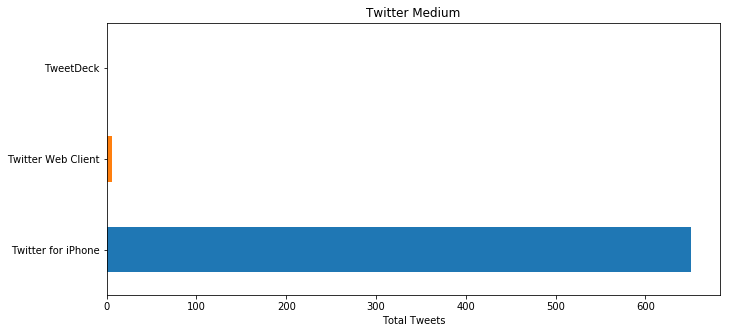

In [186]:
# iPhone in a landslide... See cell #127 for possible questions
twitter_df['source'].value_counts().plot('barh', figsize=(11,5), title='Twitter Medium').set_xlabel("Total Tweets")
plt.savefig('twitter_source')

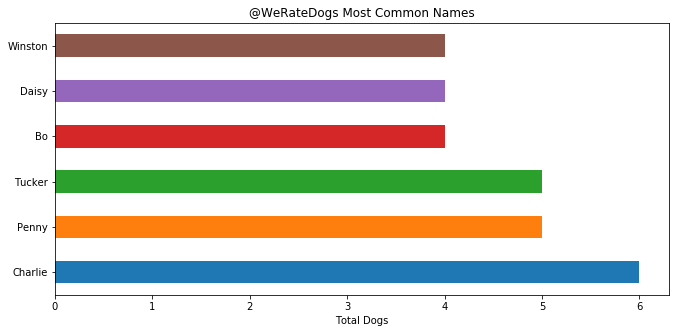

In [187]:
# Most common @WeRateDogs names horizontal bar chart
twitter_df.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='@WeRateDogs Most Common Names').set_xlabel("Total Dogs")
plt.savefig('dog_names')

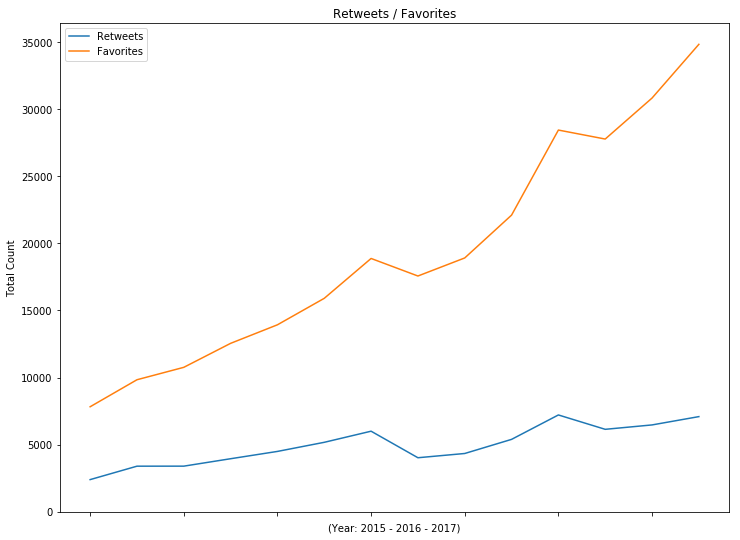

In [188]:
# @WeRateDogs Retweets / Favorites graph
plt.subplots(1, sharex=True)
twitter_df.retweet_count.groupby([twitter_df["timestamp"].dt.year, twitter_df["timestamp"].dt.month]).mean().plot('line')
twitter_df.favorite_count.groupby([twitter_df["timestamp"].dt.year, twitter_df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweets / Favorites')
plt.ylabel('Total Count')
plt.xlabel("(Year: 2015 - 2016 - 2017)")
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

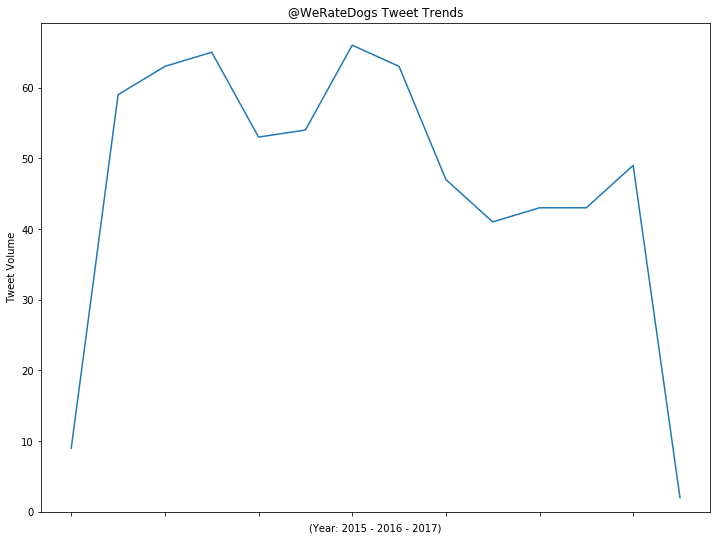

In [189]:
# @WeRateDogs Tweet Trends graph
data = twitter_df.tweet_id.groupby([twitter_df["timestamp"].dt.year, twitter_df["timestamp"].dt.month]).count()
ax = data.plot('line', title='@WeRateDogs Tweet Trends')
ax.set_xlabel("(Year: 2015 - 2016 - 2017)")
ax.set_ylabel("Tweet Volume")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

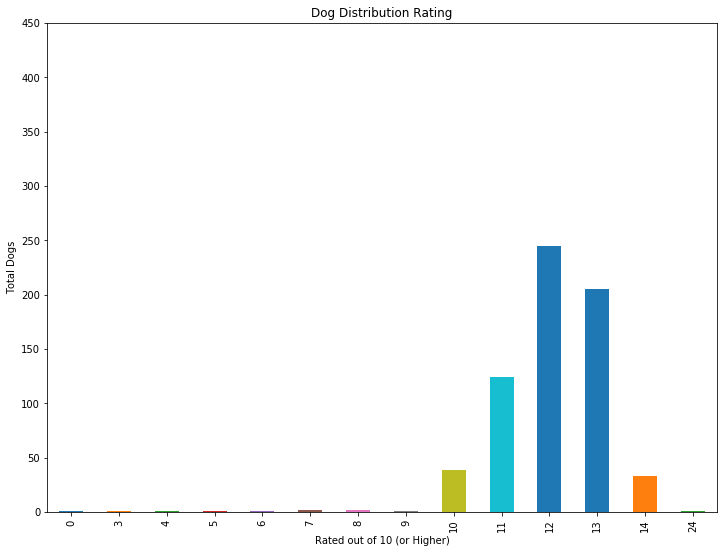

In [190]:
# @WeRateDogs Distribution Rating vertical bar chart 
ax = twitter_df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Distribution Rating')
ax.set_xlabel("Rated out of 10 (or Higher)")
ax.set_ylabel("Total Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

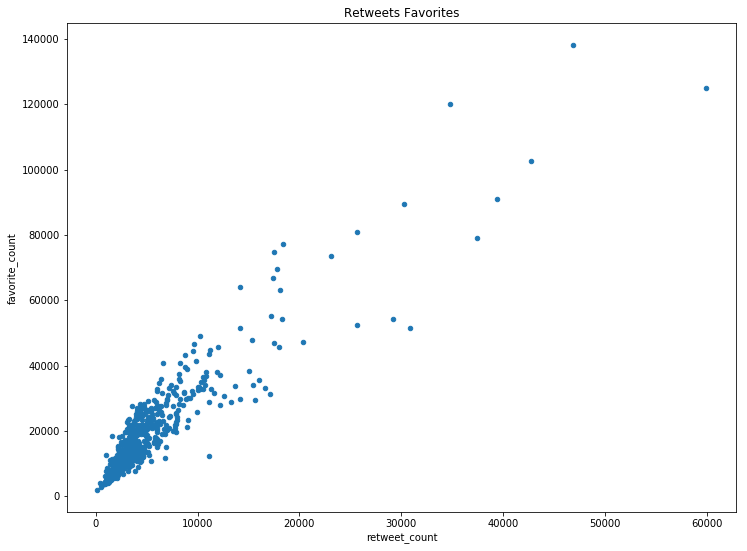

In [191]:
# @WeRateDogs Scatterplot
twitter_df.plot.scatter('retweet_count', 'favorite_count')
plt.title("Retweets Favorites")
plt.savefig('retfavscatter.png')

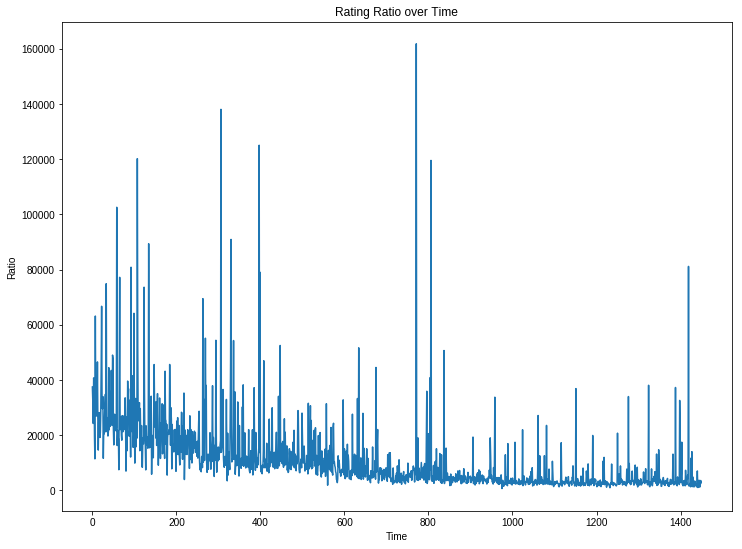

In [152]:
# @WeRateDogs Favorite_count Plot 
twitter_df['favorite_count'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating Ratio over Time')
plt.savefig('ratio.png')
plt.show()

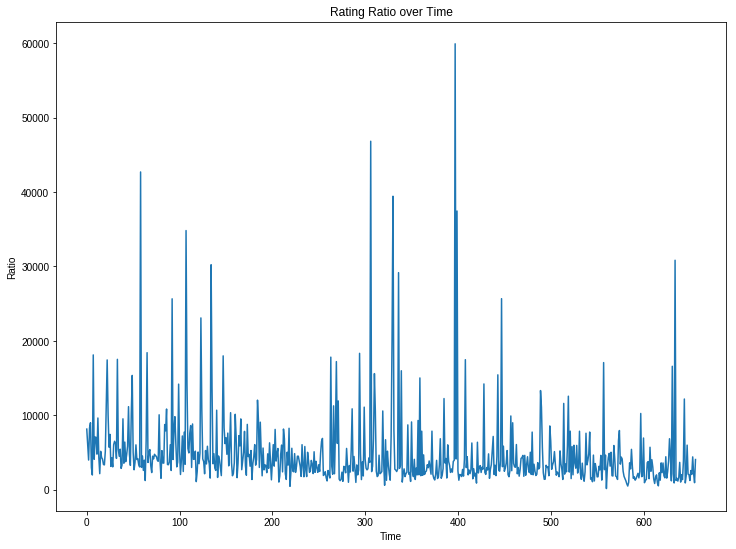

In [192]:
# @WeRateDogs Retweet_count Plot 
twitter_df['retweet_count'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating Ratio over Time')
plt.savefig('ratio.png')
plt.show()

### References 

https://acadgild.com/blog/6-steps-in-data-wrangling

https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

https://knowledge.udacity.com/?nanodegree=5d1a8326-496f-11e8-b51d-0b52a2c1b841&page=1&query=twitter%20api&sort=RELEVANCE

https://www.markdownguide.org/assets/book/markdown-guide.pdf

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

https://stackoverflow.com/

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

http://uc-r.github.io/why_wrangle

###### Udacity Mentor / Reviewer (Twitter API / json-section)